## E-Commerce Sales: Exploratory Data Analysis

##### In this Analysis we will answer some marketing realated questions, which will eventually help us to take decisions to increase Sales / Revenue by creating new offers and improving advertising strategy

### Questions like:


    

**What was the best month for sales? How much was earned that month?**

**What city sold the most product?**

**What time should we display advertisements to maximize likelihood of customer's buying product?**

**What products are most often sold together?**

##### **Importing necessary libraries**

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
import seaborn as sns

##### **Merging data from each month into one CSV**

In [5]:
path = "./Sales_data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


**Creating a new CSV for all the merged files**

In [6]:
all_months_data.to_csv("all_data.csv", index=False)

##### **Read in updated dataframe**

In [7]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Clean up the data!

#### checking for null values

In [8]:
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


##### **Null values are present!!!**

##### Dropping all null values

In [9]:
all_data = all_data.dropna(how='all')
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Adding time column

In [10]:
all_data["Time"] = all_data["Order Date"].apply(lambda x:x.split(" ")[1])


In [11]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",08:46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",22:30
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",14:38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",14:38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",09:27


In [12]:
all_data["Order Date"] = all_data["Order Date"].apply(lambda x:x.split(" ")[0])

In [13]:
temp_df = all_data[all_data["Order Date"].str[::] == 'Order']

In [14]:
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Time
519,Order ID,Product,Quantity Ordered,Price Each,Order,Purchase Address,Date
1149,Order ID,Product,Quantity Ordered,Price Each,Order,Purchase Address,Date
1155,Order ID,Product,Quantity Ordered,Price Each,Order,Purchase Address,Date
2878,Order ID,Product,Quantity Ordered,Price Each,Order,Purchase Address,Date
2893,Order ID,Product,Quantity Ordered,Price Each,Order,Purchase Address,Date
...,...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order,Purchase Address,Date
185551,Order ID,Product,Quantity Ordered,Price Each,Order,Purchase Address,Date
186563,Order ID,Product,Quantity Ordered,Price Each,Order,Purchase Address,Date
186632,Order ID,Product,Quantity Ordered,Price Each,Order,Purchase Address,Date


##### So there are some rows which are neither null nor NaN, but still they are of no use.

##### Deleting all useless rows

In [15]:
all_data = all_data[all_data["Order Date"].str[::] != 'Order']

##### Adding Month column

In [16]:
all_data['Month'] = pd.DatetimeIndex(all_data['Order Date']).month

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Time,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19,"917 1st St, Dallas, TX 75001",08:46,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19,"682 Chestnut St, Boston, MA 02215",22:30,4
3,176560,Google Phone,1,600,04/12/19,"669 Spruce St, Los Angeles, CA 90001",14:38,4
4,176560,Wired Headphones,1,11.99,04/12/19,"669 Spruce St, Los Angeles, CA 90001",14:38,4
5,176561,Wired Headphones,1,11.99,04/30/19,"333 8th St, Los Angeles, CA 90001",09:27,4


##### Adding Hour column

In [17]:
all_data['Hour'] = pd.DatetimeIndex(all_data['Time']).hour

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Time,Month,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19,"917 1st St, Dallas, TX 75001",08:46,4,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19,"682 Chestnut St, Boston, MA 02215",22:30,4,22
3,176560,Google Phone,1,600,04/12/19,"669 Spruce St, Los Angeles, CA 90001",14:38,4,14
4,176560,Wired Headphones,1,11.99,04/12/19,"669 Spruce St, Los Angeles, CA 90001",14:38,4,14
5,176561,Wired Headphones,1,11.99,04/30/19,"333 8th St, Los Angeles, CA 90001",09:27,4,9


##### Converting columns to correct format

In [18]:
all_data["Quantity Ordered"] = all_data["Quantity Ordered"].astype("int32")

In [19]:
all_data["Price Each"] = all_data["Price Each"].astype("float32")

##### Adding Sales **(USD)** Column

In [20]:
all_data["Sales"] = all_data["Quantity Ordered"]*all_data["Price Each"]

##### Adding City Column

In [21]:
def get_city(address):
    return address.split(",")[1]

def get_state(address):
    return address.split(",")[2].split(" ")[1]

In [22]:
all_data["City"]  = all_data["Purchase Address"].apply(lambda x:f"{get_city(x)} ({get_state(x)})")

# Data Exploration!

### Question 1: What was the best month for sales? How much was earned that month?

In [23]:
Q1 = all_data.groupby("Month").sum()

In [24]:
Q1

,Quantity Ordered,Price Each,Hour,Sales
Month,,,,
1,10903,1811768.375,139485,1822256.75
2,13449,2188884.750,172669,2202022.50
3,17005,2791207.750,218969,2807100.25
4,20558,3367671.000,262259,3390670.25
5,18667,3135125.000,238780,3152606.75
6,15253,2562025.500,195528,2577802.25
7,16072,2632539.500,206169,2647775.75
8,13448,2230345.500,172289,2244467.75
9,13109,2084992.125,168513,2097560.00


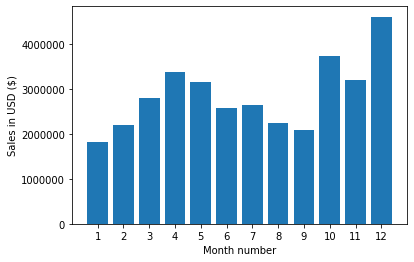

In [26]:
months=range(1,13)

plt.bar(month,all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number');

##### Best month for Sale **December**

##### `Total Sales in December in FOURTY-SIX MILLION DOLLARS (approx) USD ($ 4613443)`




### Question 2: What city sold the most product?

In [27]:
Q2 = all_data.groupby("City").sum()

In [28]:
Q2 = Q2.reset_index()

In [29]:
Q2

,City,Quantity Ordered,Price Each,Month,Hour,Sales
0,Atlanta (GA),16602,2779908.250,104794,214264,2.795498e+06
1,Austin (TX),11153,1809873.625,69829,141946,1.819582e+06
2,Boston (MA),22528,3637409.750,141112,288225,3.661642e+06
3,Dallas (TX),16730,2752627.750,104620,214390,2.767976e+06
4,Los Angeles (CA),33289,5421435.000,208325,427444,5.452571e+06
5,New York City (NY),27932,4635371.000,175741,357696,4.664318e+06
6,Portland (ME),2750,447189.250,17144,35211,4.497583e+05
7,Portland (OR),11303,1860558.250,70621,144421,1.870732e+06
8,San Francisco (CA),50239,8211461.500,315520,643265,8.262204e+06
9,Seattle (WA),16553,2733296.000,104941,213292,2.747756e+06


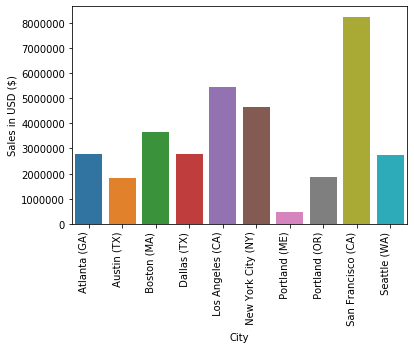

In [30]:
ax = sns.barplot(data=Q2,x="City",y="Sales")
ax.set_xticklabels(ax.get_xticklabels(), rotation="vertical", ha="right");
plt.ylabel('Sales in USD ($)');

#### `People from San Francisco sold the most products !!!`

`So we might want to reconsider the strategy for marketing for low performance areas,`

`Areas like, Portland(OR), Portland(ME), Austin(TX)`

`Like changing the strategy for marketing , spending more on advertisement, creating custom offers with respect to demographics.`

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [31]:
Q3 = all_data.groupby(["Hour"]).sum()

In [32]:
Q3 = Q3.reset_index()

In [33]:
Q3.head()

,Hour,Quantity Ordered,Price Each,Month,Sales
0,0,4428,709296.687500,27554,713721.250000
1,1,2619,458490.000000,16657,460866.875000
2,2,1398,233833.640625,8507,234851.437500
3,3,928,144726.421875,5904,145757.890625
4,4,937,162058.171875,6148,162661.015625


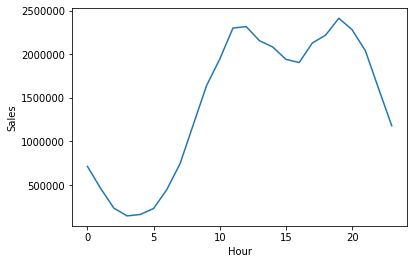

In [34]:
sns.lineplot(
    x="Hour",
    y="Sales",
    data=Q3,);

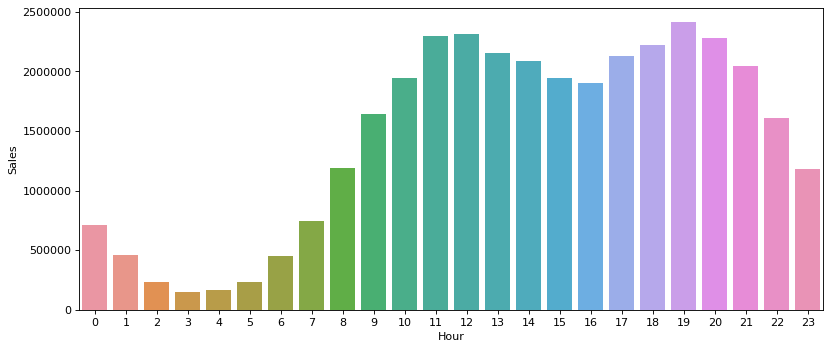

In [35]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 5), dpi=80,)

sns.barplot(
    x="Hour",
    y="Sales",
    data=Q3);

 #### `For displaying Ads, my suggestion would be before 11:00 and 19:00`

### Question 4: What products are most often sold together?

In [36]:
df = all_data[all_data["Order ID"].duplicated(keep=False)]

In [37]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Time,Month,Hour,Sales,City
3,176560,Google Phone,1,600.000000,04/12/19,"669 Spruce St, Los Angeles, CA 90001",14:38,4,14,600.000000,Los Angeles (CA)
4,176560,Wired Headphones,1,11.990000,04/12/19,"669 Spruce St, Los Angeles, CA 90001",14:38,4,14,11.990000,Los Angeles (CA)
18,176574,Google Phone,1,600.000000,04/03/19,"20 Hill St, Los Angeles, CA 90001",19:42,4,19,600.000000,Los Angeles (CA)
19,176574,USB-C Charging Cable,1,11.950000,04/03/19,"20 Hill St, Los Angeles, CA 90001",19:42,4,19,11.950000,Los Angeles (CA)
30,176585,Bose SoundSport Headphones,1,99.989998,04/07/19,"823 Highland St, Boston, MA 02215",11:31,4,11,99.989998,Boston (MA)


In [38]:
df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))

df = df[["Order ID","Grouped"]].drop_duplicates()

df.head()

C:\Users\OWAIS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [42]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,2))) #here we mentioned 2 so we are getting 2 items most bought together
    
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### So we got the most items bought together.

**iPhone and Lightning Charging Cable**

So what we can do with this data to attract more customer

One thing we can do is put some offers like,

# *Buy an Iphone and get Lightning Charging Cable for FREE*

#### Because this is the most bought products together and giving customer these kind of offers without changing the total cost,
#### we don't even have to reduce the price of these products, we can even add extra price of cable in shipping charges,
#### Studies have shown these kind of practices influences customer buying behaviour in a positive way